# Название проекта:
        
#  Принятие решений в бизнесе
_____
**Описание исследования.**
    
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

_____
**Цель исследования.**
    
Отработать теорию приоритизацией гипотез, запуска А/В-теста и анализа результатов статистическими методами.
    
_____
**Задачи исследования.**

- Подготовить данные для исследования, изучить типы, пропуски и дубликаты;
- Применить фреймворки ICE и RICE для приоритизации гипотез. Сделать выводы по результатам;
- Проверить выборки на нормальность, определиться со статтестом (параметрический или непараметрический);
- Графически проанализировать выручку, средний чек и конверсию по граппам;
- Определиться с границами для определения аномальных пользователей;
- Рассчитать статистическую значимость различий выручки, конверсии и среднего чека по группам;
- Сформировать выводы.


_____
**Исходные данные.**
    
Исходные данные представлены файлом с гипотезами и их оценками, а также двумя файлами по A/B тесту.

**Таблица hypothesis (информация о гипотезах):**

- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Таблица orders (информация о заказах):**

- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

**Таблица visitors (информация о пользователях на дату):**

- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

______
**Данное исследование разделим на несколько частей.**
    
[***Часть 1. Изучение данных из файла:***](#1)
* [1. Изучение файлов с данными, получение общей информации, загрузка библиотек.](#11)
* [2. Проверка дубликатов и типов данных.](#12)

[***Часть 2. Приоритизация гипотез:***](#2)
    
[***Часть 3. Анализ A/B-теста:***](#3)
* [1. Проверка данных на нормальность.](#31)
* [2. Построение кумулятивных графиков.](#32)
* [3. Поиск аномальных клиентов.](#33)
* [4. Работа с сырыми данными.](#34)
* [5. Работа с очищенными данными.](#35)
    
[***Часть 4. Общий вывод.***](#4)    

<a id='1'></a>
## Изучение и подготовка данных

<a id='11'></a>
### Импортируем планируемые к применению в проекте библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np
import scipy.stats as st

import warnings

warnings.filterwarnings('ignore')

### Открываем файлы

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

<a id='12'></a>
### Проверяем датасеты

**Гипотезы**

- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
# приводим название столбцов к нижнему регистру

hypothesis.columns = [x.lower() for x in hypothesis.columns]

In [6]:
hypothesis['hypothesis'].duplicated().sum()

0

**Вывод**

- пропуски и дубликаты отсутствуют;
- все оценки в числовом виде, проблем с расчетами не будет. 

**Заказы**

- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

In [7]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [10]:
round((orders.isna().mean()*100),2)

transactionId    0.0
visitorId        0.0
date             0.0
revenue          0.0
group            0.0
dtype: float64

In [11]:
orders.duplicated().sum()

0

In [12]:
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

In [13]:
orders['group'].value_counts(normalize=True)

B    0.53467
A    0.46533
Name: group, dtype: float64

In [14]:
orders.groupby('group')['revenue'].sum()

group
A    4084803
B    5907760
Name: revenue, dtype: int64

In [15]:
orders.groupby('group')['revenue'].sum() / orders['group'].value_counts()

A    7333.578097
B    9230.875000
dtype: float64

In [16]:
orders.groupby('group')['visitorId'].nunique()

group
A    503
B    586
Name: visitorId, dtype: int64

In [17]:
print(orders['date'].max())
print(orders['date'].min())

2019-08-31 00:00:00
2019-08-01 00:00:00


**Вывод**

- пропуски и дубликаты отсутствуют;
- данные за август 2019 года;
- группа В превосходит А в количестве заказов, выручке и среднему чеку на заказ.
- при этом число клиентов в каждой группе также неравномерно

**Посещения**

- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

In [18]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [19]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [20]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [21]:
round((visitors.isna().mean()*100),2)

date        0.0
group       0.0
visitors    0.0
dtype: float64

In [22]:
visitors.duplicated().sum()

0

In [23]:
visitors.groupby('group')['visitors'].sum()

group
A    18736
B    18916
Name: visitors, dtype: int64

In [24]:
print(visitors['date'].max())
print(visitors['date'].min())

2019-08-31 00:00:00
2019-08-01 00:00:00


**Вывод**

- пропуски и дубликаты отсутствуют;
- данные за август 2019 года;
- группы, на первый взгляд, равномерные в части количества посетителей. В части 3 изучим это более подробно с помощью статтеста.

<a id='2'></a>
## Приоритизация гипотез

Задача
- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.


$$ICE = \frac{Impact * Confidence}{Efforts}$$

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

In [25]:
pd.options.display.max_colwidth = 100

In [26]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [27]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

In [28]:
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


In [29]:
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Вывод**

- В случае с ICE на первом месте расположилась гипотеза 8, однако метод RICE кинул её в середину списка за счет самого низкого показателя REACH. Таким образом при полном анализе решение данной гипотезы является не первостепенной задачей, с учетом минимального охвата пользователей;
- И в свою очередь метод RICE вывел в лидеры гипотезу 7 за счет её наибольшего охвата. Без учета охвата данная гипотеза занимала 3 место.

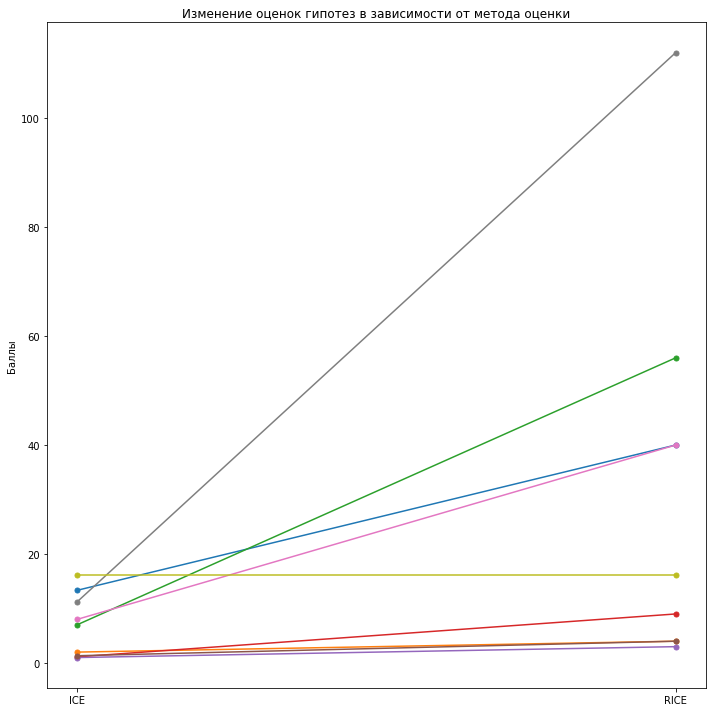

In [30]:
hyp = hypothesis['hypothesis']

fig, ax = plt.subplots(1, figsize=(10,10))

for i in hyp:
    points = hypothesis[hypothesis['hypothesis'] == i]
    plt.plot(['ICE', 'RICE'], [points.ICE, points.RICE], marker='o', markersize=5)
    
plt.ylabel('Баллы')
plt.title('Изменение оценок гипотез в зависимости от метода оценки')
plt.tight_layout()
plt.show()

<a id='3'></a>
## Анализ A/B-теста

<a id='31'></a>
### Проверка данных на нормальность

Протестируем данные о ежедневном количестве пользователей на сайте на нормальность с помощью теста и графика

In [31]:
# для начала сформируем списки данных с посещениями группы А и В

sampleA = visitors[visitors['group'] == 'A']['visitors']
sampleB = visitors[visitors['group'] == 'B']['visitors']

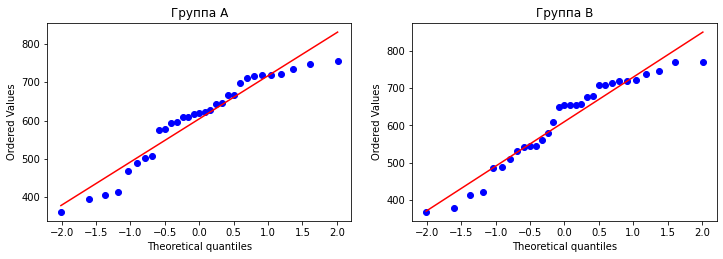

In [32]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
st.probplot(sampleA, dist="norm", plot=plt)
plt.title("Группа А")

# вторая выборка
plt.subplot(2,2,2)
st.probplot(sampleB, dist="norm", plot=plt)
plt.title("Группа В")
plt.show()

Визуально, распределение ненормальное, т.к. данные имеют значительные отклонения от прямой нормального распределения. Однако степень "ненормальности" и статзначимость по графику не определить.
Проведем тест Шапиро-Уилка.

*Гипотеза теста:*

- H0: эмпирическое распределение соответствует нормальному
- H1: эмпирическое распределение не соответствует нормальному

In [33]:
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(sampleA)
p_value = results[1]

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу по группе А: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, в группе А всё нормально') 
    
print()

results = st.shapiro(sampleB)
p_value = results[1]

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу по группе А: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, в группе А всё нормально') 

p-значение:  0.029194815084338188
Отвергаем нулевую гипотезу по группе А: распределение не нормально

p-значение:  0.036449261009693146
Отвергаем нулевую гипотезу по группе А: распределение не нормально


И все таки они не нормальные!
Значит используем Манна-Уитни.

<a id='32'></a>
### Построение кумулятивных графиков

Для построения графиков требуются кмулятивные данные. Сделаем их. 

In [34]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

# Соберём агрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 

# Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']) 

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

# получаем таблицу с распределение заказов, покупателей, выручки и посетителей на каждую дату теста в разрезе обеих групп

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


#### График кумулятивной выручки по группам

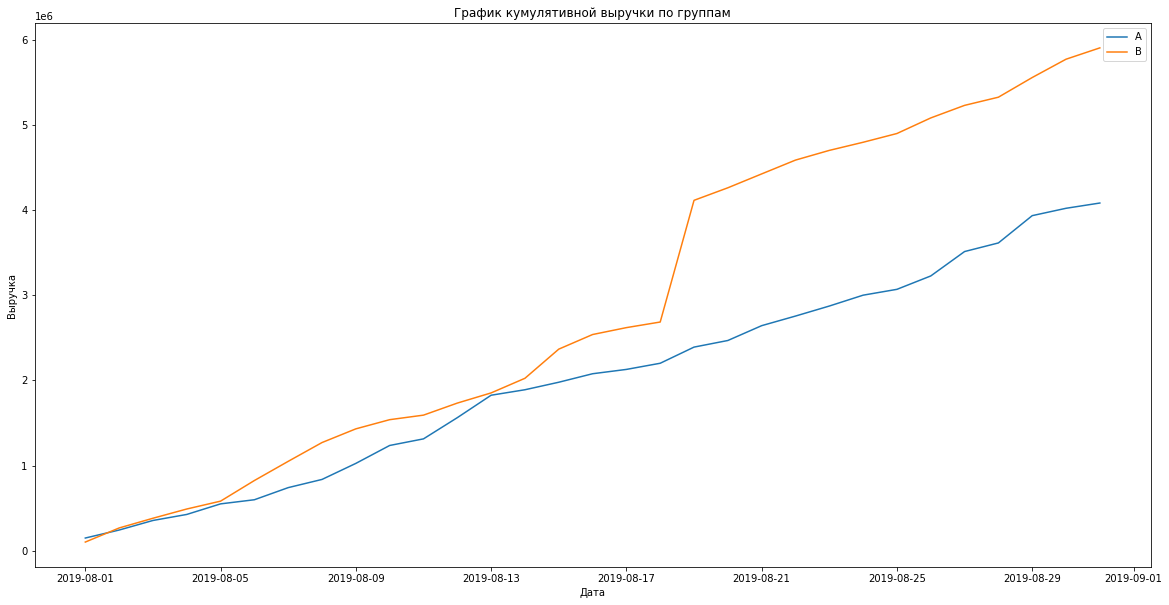

In [35]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(20,10))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('График кумулятивной выручки по группам')
plt.legend();

In [36]:
cumulativeRevenueA.head(5)

,date,revenue,orders
0,2019-08-01,148579,24
2,2019-08-02,242401,44
4,2019-08-03,354874,68
6,2019-08-04,425699,84
8,2019-08-05,549917,109


**Вывод**

- C 1 августа по 17 выручка двух групп растет равномерно, группа В незначительно опережает группу А;
- С 17 августа в группе В происходит резкий всплеск выручки, далее, графически, темпы роста выручки аналогичные группе А;
- Однако из-за этой "ступеньки" группа В значительно опережает группу А на конец теста
- Будет интересно посмотреть аналогичный график после исключения аномальных клиентов.

#### График кумулятивного среднего чека по группам

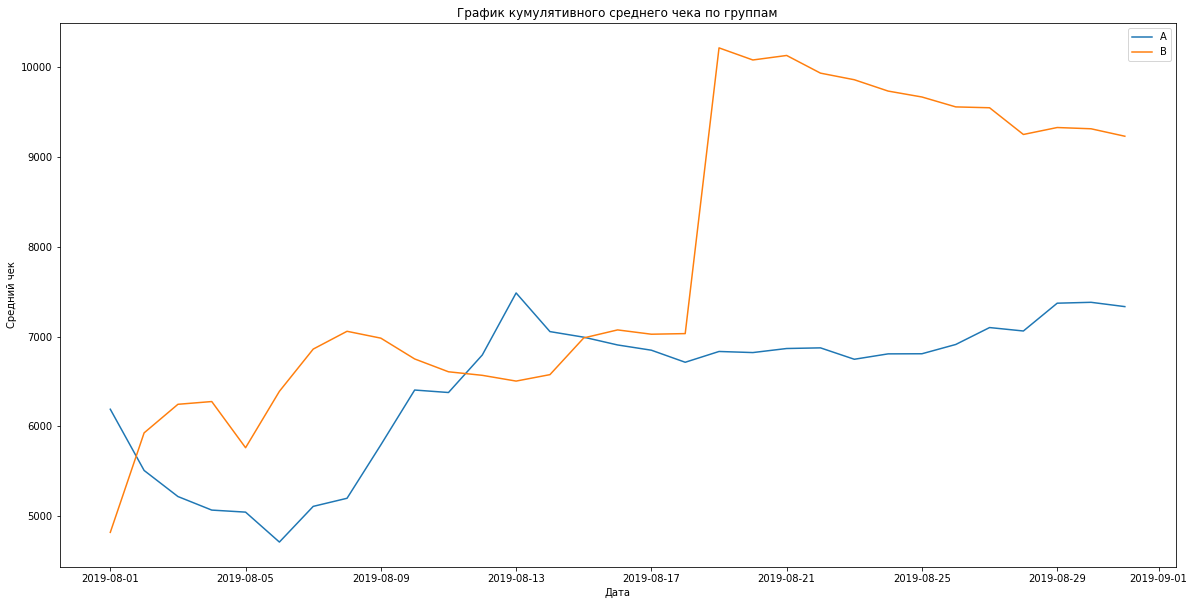

In [37]:
# Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов

plt.figure(figsize=(20,10))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title('График кумулятивного среднего чека по группам')
plt.legend();

**Вывод**

- Аналогично прошлому графику, у группы В наблюдается значительный всплеск среднего чего.
- Да и данные до 17 августа не внушают доверия своей волатильностью;
- При этом по группе А возможно сказать, что они стали равномерные к концу теста, тогда как у В стабильное падение после ступеньки 17 августа, то есть средний чек еще не отыграл ту аномальную покупку(и).

#### График относительного изменения кумулятивного среднего чека группы В к группе А

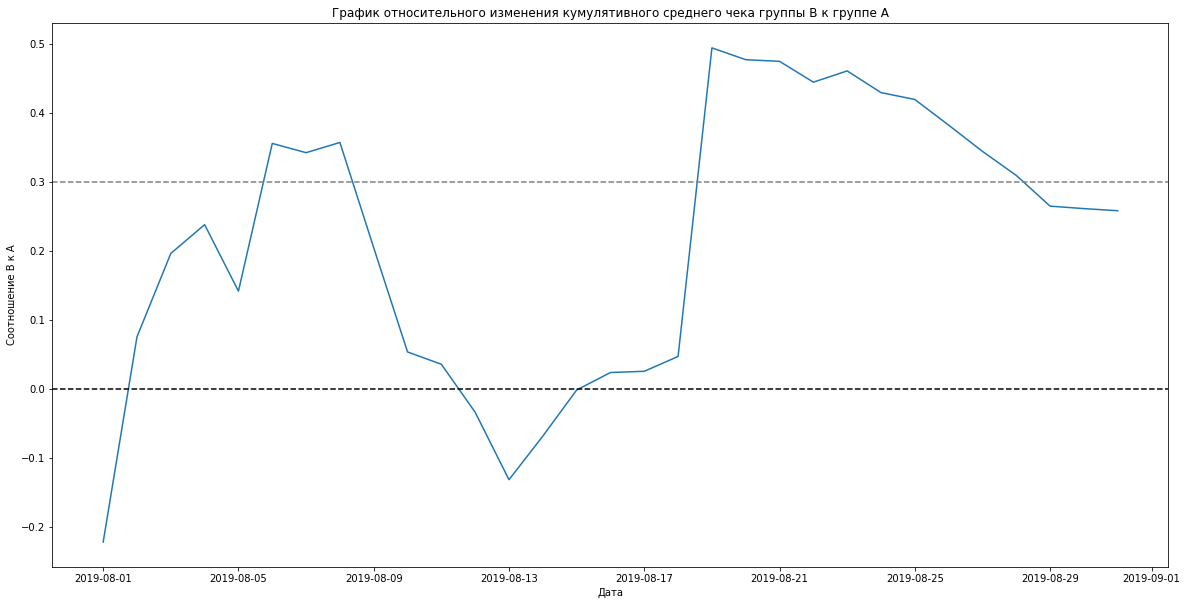

In [38]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(20,10))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.3, color='grey', linestyle='--')


plt.xlabel('Дата')
plt.ylabel('Соотношение В к А')
plt.title('График относительного изменения кумулятивного среднего чека группы В к группе А');

In [39]:
mergedCumulativeRevenue.head(5)

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101


**Вывод**

- И опять покупка в группе В в районе 17 числа портит всю картину, до этой ступеньки превосходство группы В не было явным.
- Более того, возможно в группе А также имеется аномалия, но чуть раньше, из-за разкого падения отношения группы В к А в районе 7 числа;
- Резкая ступенькая у группы А в прошлом графике (средние чеки) возможно косвенно это подтверждает. При этом общий объем выручки в районе 7-8 числа у группы А не имеет ступенький и резких изменений. Видимо общая выручка не скакнула, а вот резкий чек увеличился, что говорил о падении числа клиентов, но увеличении суммы покупок у оставшихся. По идеи увидим ступеньку в конверсии у группы А на следующем графике в эти даты.

#### График кумулятивной конверсии по группам

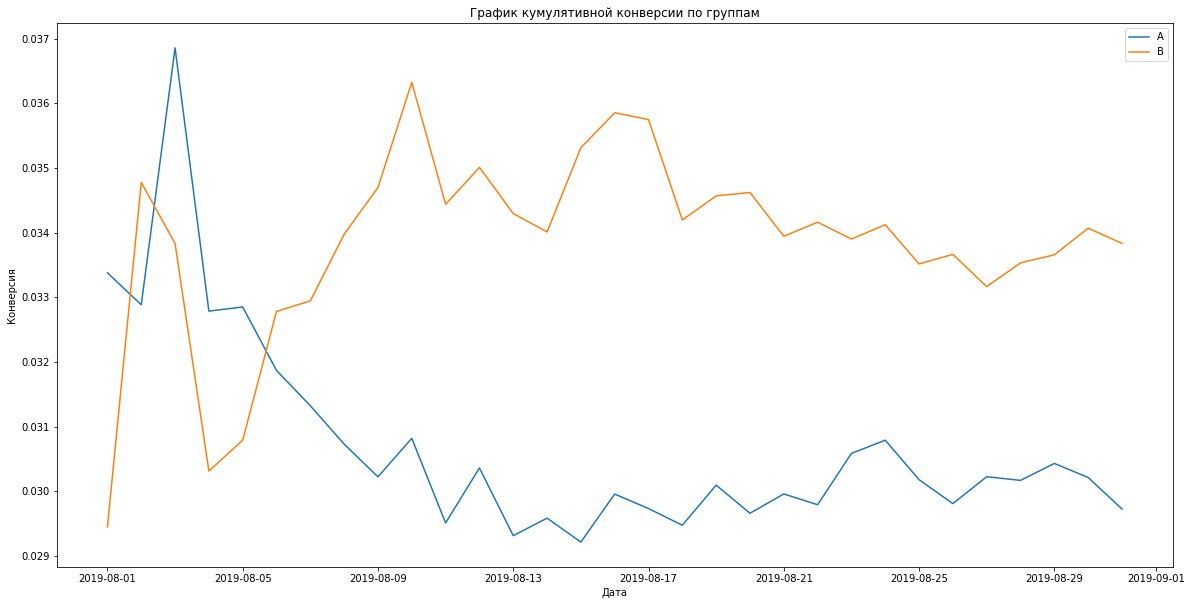

In [40]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(20,10))
# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.title('График кумулятивной конверсии по группам')
plt.legend();

In [41]:
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
1,2019-08-01,B,21,20,101217,713,0.029453
2,2019-08-02,A,44,38,242401,1338,0.032885
3,2019-08-02,B,45,43,266748,1294,0.034776
4,2019-08-03,A,68,62,354874,1845,0.036856


**Вывод**

- Группа А попалась, резкое падение конверсии с 7 числа, как и предполагалось.
- Начиная с 21 числа можно сказать, что конверсия стабилизировалась, тут группа В побеждает в среднем на 0.5ПП, но статистически ли это значимо?

#### График относительного изменения кумулятивной конверсии группы В к группе А

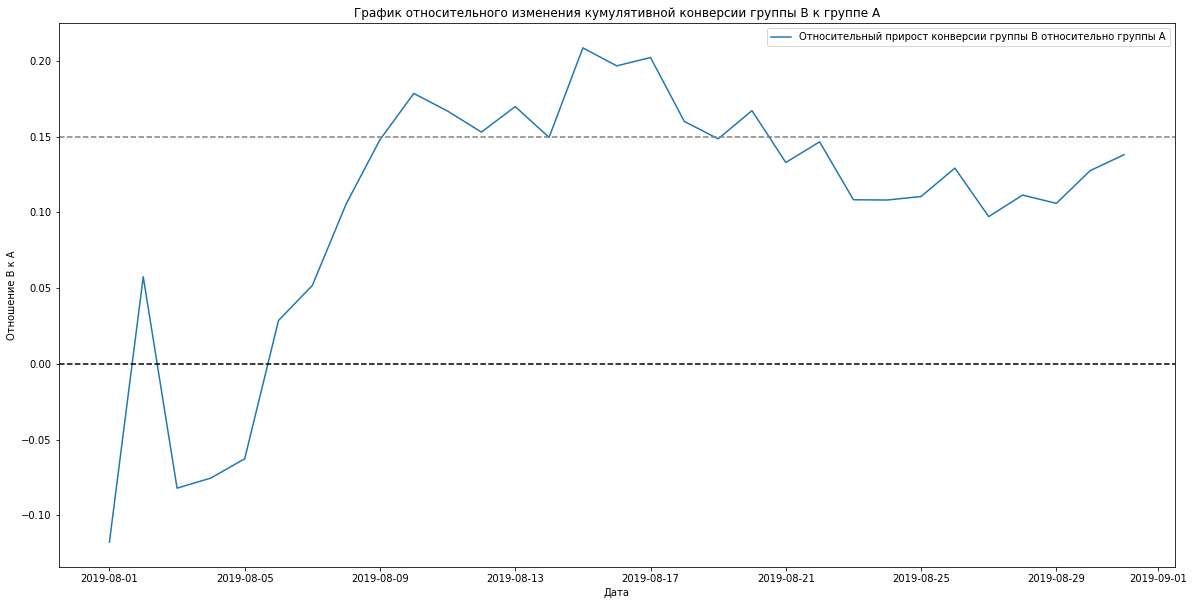

In [42]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(20,10))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')

plt.xlabel('Дата')
plt.ylabel('Отношение В к А')
plt.title('График относительного изменения кумулятивной конверсии группы В к группе А');

In [43]:
mergedCumulativeConversions.head(5)

,date,conversionA,conversionB
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793


**Вывод**

- Первые недели теста были значительные колебания, а начиная с 13 числа группа В стабильно опережает в конверсии на 15%, при этом по данному графику видно, что конверсия еще не стабилизовалась и выводы делать рановато.

<a id='33'></a>
### Поиск аномальных клиентов

#### Аномалии в количестве заказов

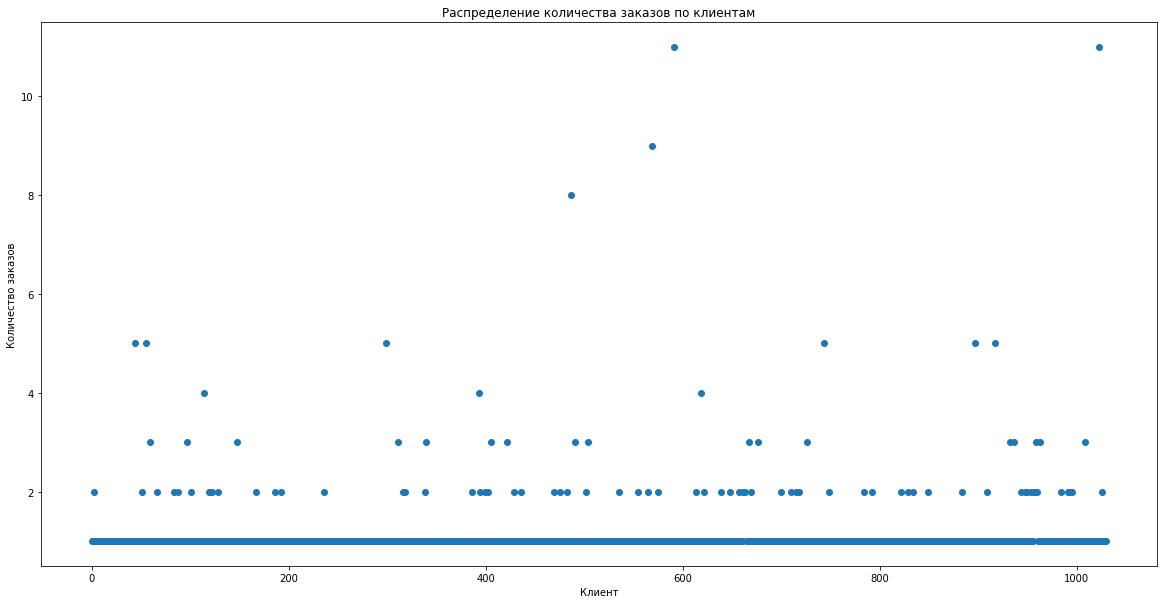

In [44]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'}))

ordersByUsers.columns = ['userId', 'orders']

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(20,10))
plt.scatter(x_values, ordersByUsers['orders'])

plt.xlabel('Клиент')
plt.ylabel('Количество заказов')
plt.title('Распределение количества заказов по клиентам');

Большинство пользователей делает 1 заказ, однако с 2 заказами людей также немало, но пока непонятно, аномалия это или нет. С 3 и более заказами, скорее всего аномальные. Оценим через расчет перцентиля. 

In [45]:
np.percentile(ordersByUsers['orders'], [90, 95, 99])

array([1., 2., 4.])

Не более 1% пользователей делает больше чем 4 заказа, а в 5% укладываются уже более 2х заказов.
Это количество заказов и возьмем за границу.

#### Аномалии в стоимостях заказов

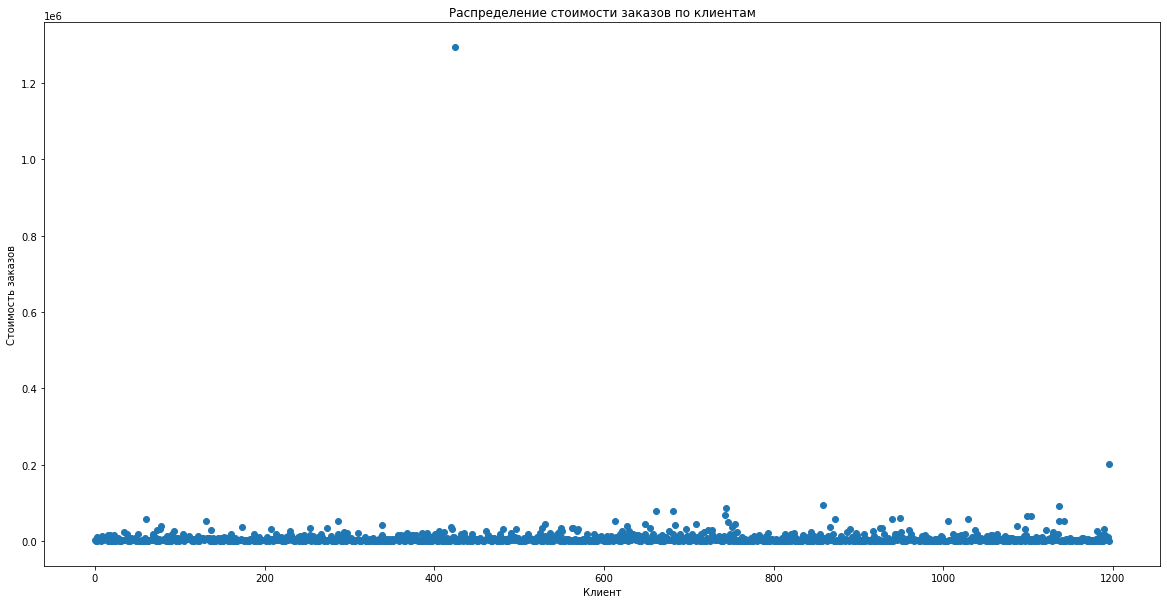

In [46]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(20,10))
plt.scatter(x_values, orders['revenue'])

plt.xlabel('Клиент')
plt.ylabel('Стоимость заказов')
plt.title('Распределение стоимости заказов по клиентам');

По такому графику сложно определить явные аномалии, кроме совсем явных. Попробуем приблизить интересную нам зону графика и посчитаем перцентили. 

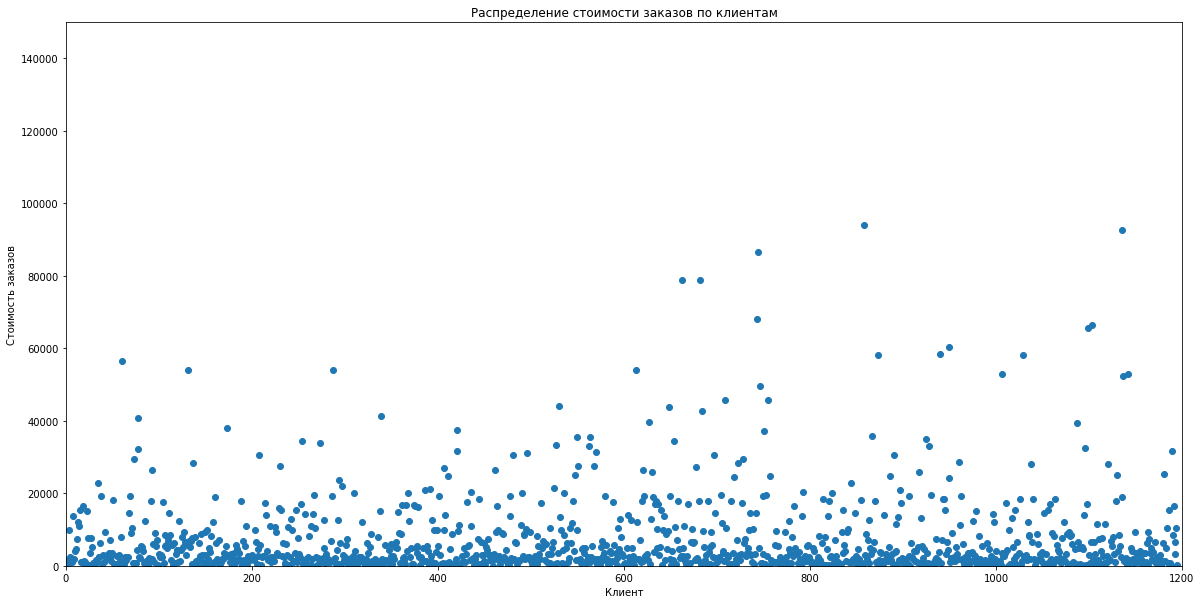

In [47]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(20,10))
plt.scatter(x_values, orders['revenue'])
plt.axis([0, 1200, 0, 150000])

plt.xlabel('Клиент')
plt.ylabel('Стоимость заказов')
plt.title('Распределение стоимости заказов по клиентам');

In [48]:
np.percentile(orders['revenue'], [90, 95, 99])

array([18168. , 28000. , 58233.2])

В данному случае можно обрезать 1%, т.к. если взглянуть на график, то плотность у пользователей между 95 и 99 перцентилем достаточная.

<a id='34'></a>
### Работа с сырыми данными

In [49]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,visitorsPerDateA,visitorsPerDateB
0,2019-08-01,24,148579,21,101217,719,713
1,2019-08-02,20,93822,24,165531,619,581
2,2019-08-03,24,112473,16,114248,507,509
3,2019-08-04,16,70825,17,108571,717,770
4,2019-08-05,25,124218,23,92428,756,707


**В рамках проверок гипотез:**

- За уровень статзначимости взято 5% (0.05);
- Статистический тест - Манна-Уитни.

#### Различия в конверсии

**Н0** - Конверсии групп А и В одинаковые;

**Н1** - Конверсии групп А и В различны.

In [50]:
# Создадим переменные, в которых будут пользователи, которые заказывали хотя бы 1 раз, а также их число заказов

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique}))

ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique}))

ordersByUsersB.columns = ['userId', 'orders'] 

# объявим переменные в которых пользователям из разных групп будет соответствовать количество заказов

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

# выведем относительный прирост конверсии группы В к группе А, а также p-value различия конверсии.
p_value = (st.mannwhitneyu(sampleA, sampleB)[1])
print('p_value =', "{0:.3f}".format(p_value))

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: различия в конверсии статистически значимы')
else:
    print('Не получилось отвергнуть нулевую гипотезу, различия в конверсии статистически не значимы') 
    
print()
print('Относительный прирост конверсии группы В к группе А =', "{0:.2%}".format(sampleB.mean() / sampleA.mean() - 1))

p_value = 0.017
Отвергаем нулевую гипотезу: различия в конверсии статистически значимы

Относительный прирост конверсии группы В к группе А = 13.81%


#### Различия в среднем чеке

**Н0** - Средние чеки групп А и В одинаковые;

**Н1** - Средние чеки групп А и В различны.

In [51]:
p_value = (st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1])
print('p_value =', "{0:.3f}".format(p_value))

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: различия в среднем чеке статистически значимы')
else:
    print('Не получилось отвергнуть нулевую гипотезу, различия в среднем чеке статистически не значимы') 
    
print()
print('Относительный прирост среднего чека группы В к группе А =', "{0:.2%}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean() - 1))

p_value = 0.729
Не получилось отвергнуть нулевую гипотезу, различия в среднем чеке статистически не значимы

Относительный прирост среднего чека группы В к группе А = 25.87%


**Вывод**

- Вырисовывается интересная картина, по конверсии относительный прирост составил 14%, при этом данный прирост можно считать статистически значимым;
- А по среднему чеку p-value зашкаливает, при этом относительный прирост 26%! Ожидаем, что после очистки аномалий этот прирост должен сильно упасть.

Приступим к очистке данных и расчетам по ним. 

<a id='35'></a>
### Работа с очищенными данными

#### Очистка данных

Напомню, что в верхних границах было выбрано отсечь 3 и более заказов, а также заказы более 58233 рублей.

In [52]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 58233]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print(abnormalUsers.head(5))
print(abnormalUsers.count())

1099    148427295
18      199603092
23      237748145
37      249864742
68      457167155
dtype: int64
31


Выходит 31 таких пользователей.

#### Различия в конверсии


**Н0** - Конверсии групп А и В одинаковые;

**Н1** - Конверсии групп А и В различны.

In [53]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

p_value = (st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1])
print('p_value =', "{0:.3f}".format(p_value))

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: различия в конверсии статистически значимы')
else:
    print('Не получилось отвергнуть нулевую гипотезу, различия в конверсии статистически не значимы') 
 
print()
print('Относительный прирост конверсии группы В к группе А =', "{0:.2%}".format(sampleBFiltered.mean()/sampleAFiltered.mean() - 1))

p_value = 0.010
Отвергаем нулевую гипотезу: различия в конверсии статистически значимы

Относительный прирост конверсии группы В к группе А = 17.43%


#### Различия в среднем чеке


**Н0** - Средние чеки групп А и В одинаковые;

**Н1** - Средние чеки групп А и В различны.

In [54]:
p_value = (st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1])


print('p_value =', "{0:.3f}".format(p_value))

if p_value < alpha:
    print('Отвергаем нулевую: различия в среднем чеке статистически значимы')
else:
    print('Не получилось отвергнуть нулевую гипотезу, различия в среднем чеке статистически не значимы') 

print()
print('Относительный прирост среднего чека группы В к группе А =', 
    "{0:.2%}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1))

p_value = 0.798
Не получилось отвергнуть нулевую гипотезу, различия в среднем чеке статистически не значимы

Относительный прирост среднего чека группы В к группе А = -2.00%


<a id='4'></a>
## Общие выводы

### p-value и относительные изменения по конверсии
#### до очистки

In [55]:
p_value = (st.mannwhitneyu(sampleA, sampleB)[1])
print('p_value =', "{0:.3f}".format(p_value))
print()
print('Относительный прирост конверсии группы В к группе А =', "{0:.2%}".format(sampleB.mean() / sampleA.mean() - 1))

p_value = 0.017

Относительный прирост конверсии группы В к группе А = 13.81%


#### после

In [56]:
p_value = (st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1])
print('p_value =', "{0:.3f}".format(p_value))
print()
print('Относительный прирост конверсии группы В к группе А =', "{0:.2%}".format(sampleBFiltered.mean()/sampleAFiltered.mean() - 1))

p_value = 0.010

Относительный прирост конверсии группы В к группе А = 17.43%


### p-value и относительные изменения по среднему чеку
#### до очистки

In [57]:
p_value = (st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1])
print('p_value =', "{0:.3f}".format(p_value))
print()
print('Относительный прирост среднего чека группы В к группе А =', "{0:.2%}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean() - 1))

p_value = 0.729

Относительный прирост среднего чека группы В к группе А = 25.87%


#### после

In [58]:
p_value = (st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1])
print('p_value =', "{0:.3f}".format(p_value))
print()
print('Относительный прирост среднего чека группы В к группе А =', 
    "{0:.2%}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )]['revenue'].mean() - 1))

p_value = 0.798

Относительный прирост среднего чека группы В к группе А = -2.00%


**Вывод**

- Очистка данных не повлияла на статистическую значимость изменения среднего чека, более того очистка аномалий показала незначительное падение среднего чека группы В на 2%.
- В свою очередь по конверсии очистка данных усилила статистическую значимость превосходства группы В от группы А, относительный рост конверсии 17%.
- При этом, если взглянуть на графики относительных изменений конверсии и среднего чека можно также заметить, что по среднему чеку динамика еще чересчур волатильная и недостаточная для принятия решения и выводов, на текущий момент заметно снижение превосходства группы В над А по среднему чеку, а по относительной конверсии группа В как будто зафиксировала своё среднее превосходство. Но как будто чего то не хватает. 

Возможно еще пара недель теста зафиксировали бы результаты и наши выводы, о том что новвоведение в интернет магазине положительным образом сказывается на росте конверсии.
Или же наоборот, относительная конверсия В снизилась бы, а средний чек также показал бы отрицательную динамику, хоть и минимальную. Поэтому смысла в новвоведении не было бы.

**Поэтому предлагаю продолжить тест до получения дополнительных данных и сделать окончательные вывод уже по итогам нового анализа.**

С одной стороны мы зафиксировали рост конверсии и этот рост статистически значим (P-value = 0.01 по очищенным данным, калькулятор сайта также однозначен:

In [59]:
cumulativeData.tail(2)

,date,group,orders,buyers,revenue,visitors,conversion
60,2019-08-31,A,557,503,4084803,18736,0.029729
61,2019-08-31,B,640,586,5907760,18916,0.033834


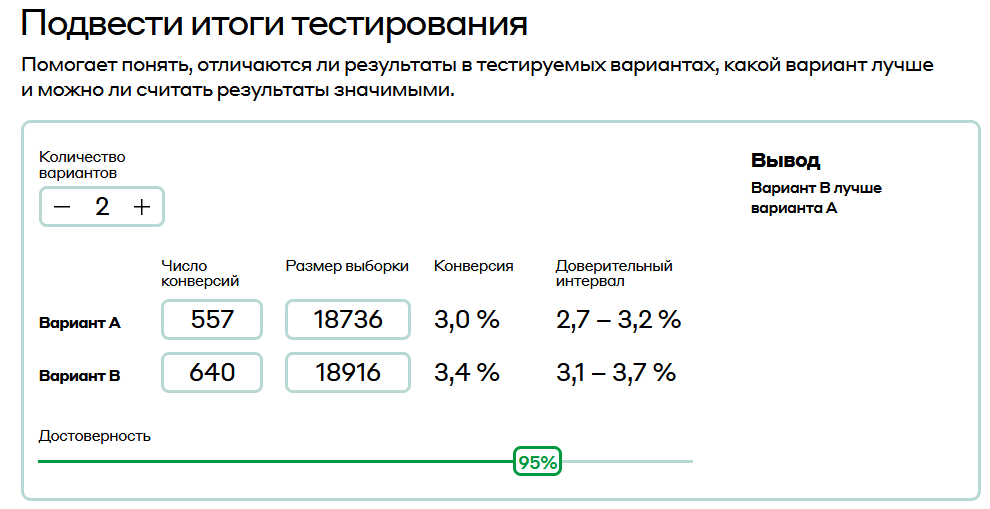

Однако графики кумулятивной конверсии по группам и относительного изменения В к А однозначно говорят, что тестовая конверсия группы В еще не стабилизовалась.

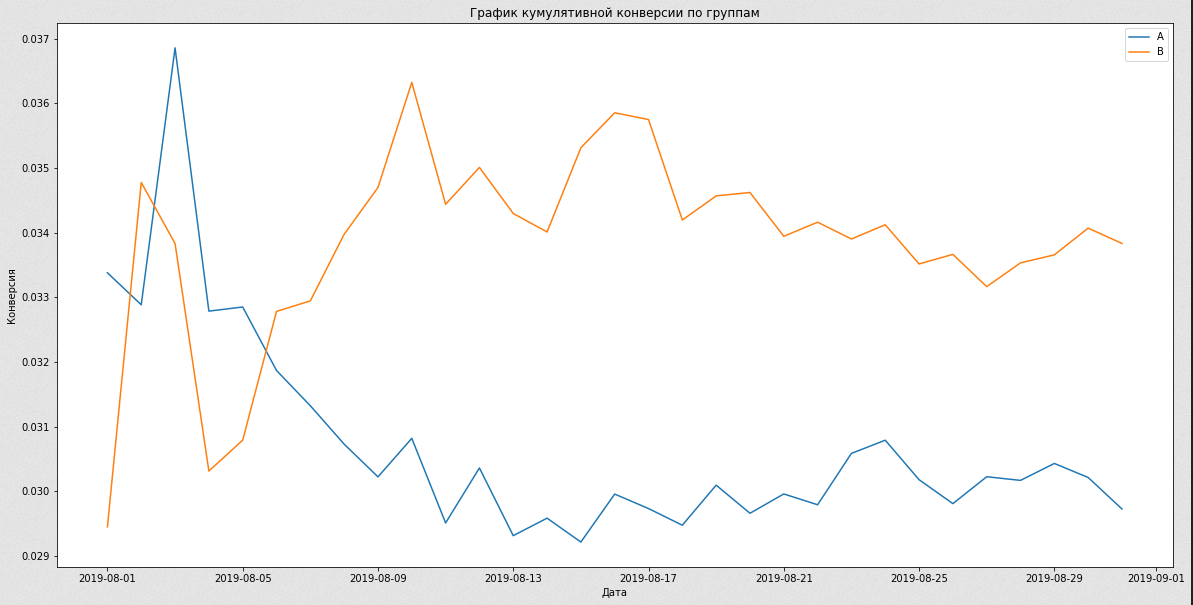

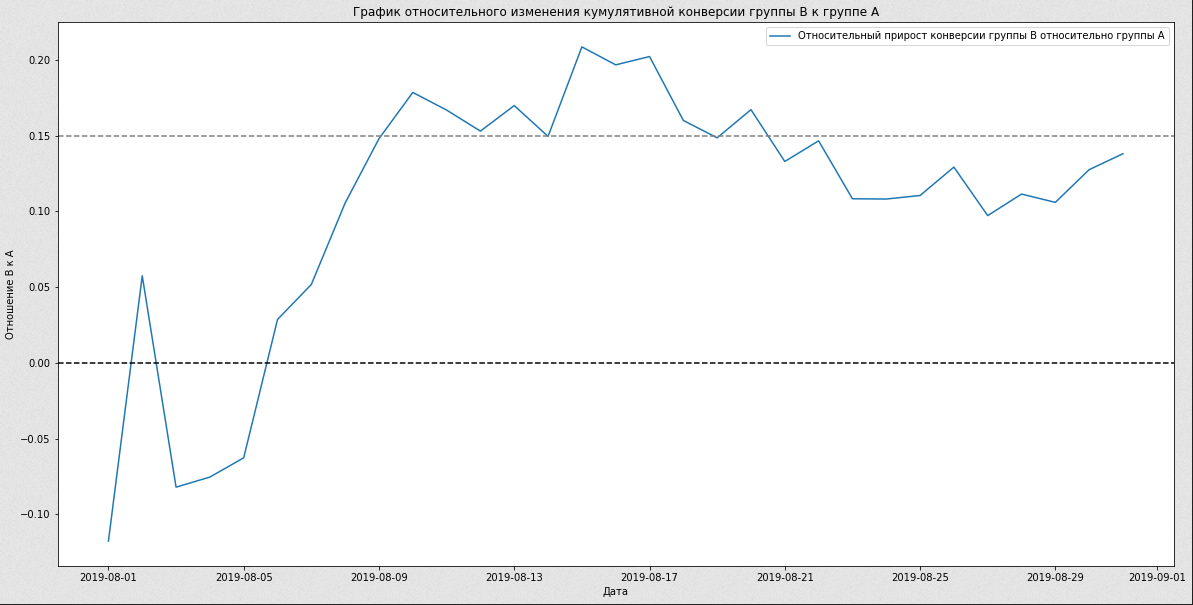

Также это подтверждается калькулятором в плане расчета размера выборки.

Дано - среднее значение принимаем как значение конверсии группы А
Планируем увеличить в абсолютных значениях на 0,4% (текущий абсолютный прирост кумулятивной конверсии группы В к группе А).

Таким образом требуется по 27тыс посетителей в каждую группу. На текущий момент у нас 19 тыс. 
Таким образом, в среднем, для достижения 27тыс нам понадобится еще 13 дней (как ранее и говорил около пары недель).

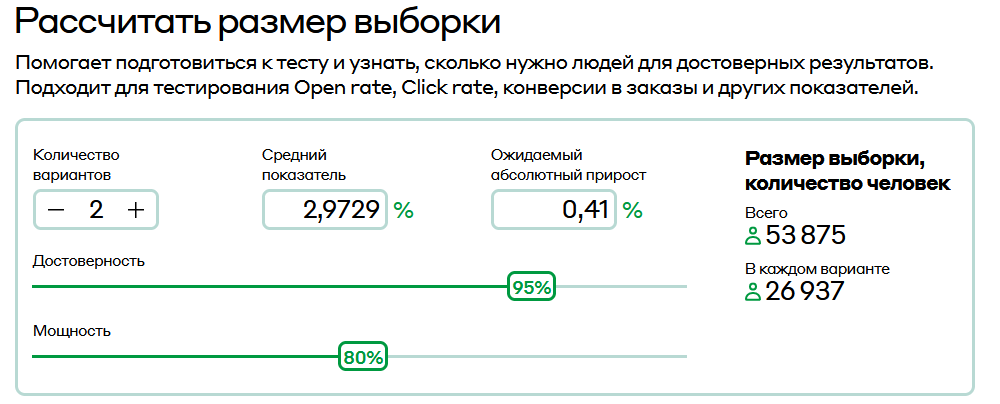